In [1]:
# task1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%config InlineBacked.figure_forman = 'svg'
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [23]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

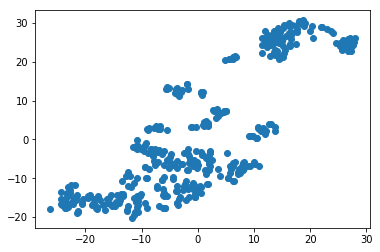

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [33]:
# task 2

In [34]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [37]:
labels_train = kmeans.fit_predict(X_train_scaled)

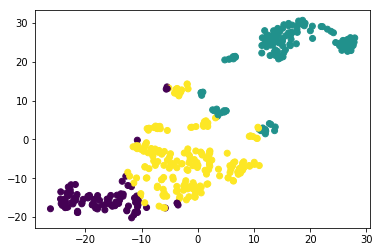

In [38]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)

In [39]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [40]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [41]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [43]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [44]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [45]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

In [47]:
# task 3

In [48]:
labels_test = kmeans.predict(X_test_scaled)

In [58]:
y_test[labels_test==0].mean()

price    31.35
dtype: float64

In [60]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [61]:
y_test[labels_test==2].mean()

price    21.860784
dtype: float64

In [53]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [54]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [55]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176